<a href="https://colab.research.google.com/github/BlackPuma075/Cosmo_class_2024/blob/main/CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install classy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for classy: filename=classy-3.2.3.2-cp310-cp310-linux_x86_64.whl size=34180952 sha256=5054a1606730bd685c198f60e2a2f5dade689c091c4ef6e712d2cc18a3b043b6
  Stored in directory: /root/.cache/pip/wheels/1d/53/d6/99853a1577044e4da2a37fc04ff3515d79911e665944af0991
Successfully built classy


In [2]:
from classy import Class

In [3]:
# create instance of the class "Class"
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM.compute()

In [4]:
# get all C_l output
cls = LambdaCDM.lensed_cl(2500)
# To check the format of cls
cls.keys()

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

In [5]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

In [6]:
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi

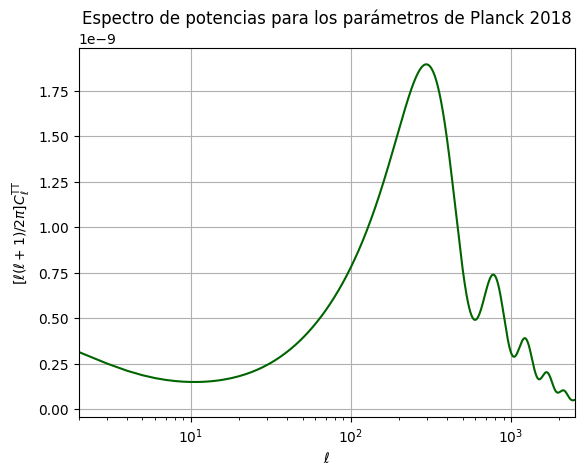

In [17]:
# plot C_l^TT
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'-', color = 'darkgreen')
plt.grid()
plt.title('Espectro de potencias para los parámetros de Planck 2018')
plt.savefig('Power spectrum Planck')

In [8]:
#plt.savefig('warmup_cltt.pdf')

In [9]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

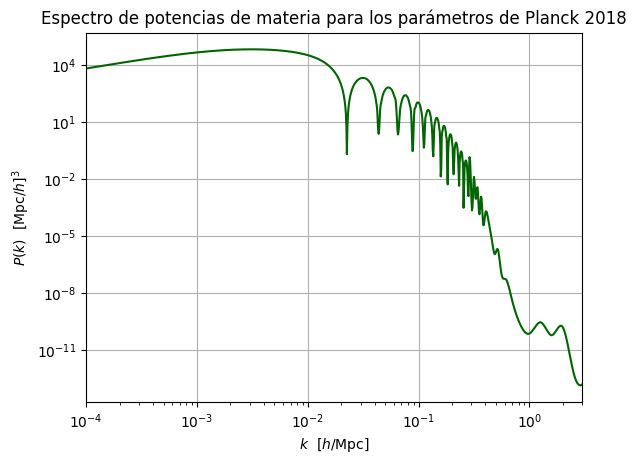

In [18]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'-', color = 'darkgreen')
plt.grid()
plt.title('Espectro de potencias de materia para los parámetros de Planck 2018')
plt.savefig('Matter Power Spectrum Planck')

In [11]:
#plt.savefig('warmup_pk.pdf')

In [12]:
# optional: reset parameters to default in case you want
# to set different parameters and rerun LambdaCDM.compute()
#LambdaCDM.empty()